In [ ]:
%cd '/content/drive/My Drive/Data-Preprocessing-Virtual-Try-On'

/content/drive/My Drive/Data-Preprocessing-Virtual-Try-On


In [ ]:
######## OPENPOSE KEYPOINTS

In [ ]:
!git clone https://github.com/CMU-Perceptual-Computing-Lab/openpose

Cloning into 'openpose'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 22654 (delta 5), reused 10 (delta 3), pack-reused 22637
Receiving objects: 100% (22654/22654), 84.53 MiB | 13.94 MiB/s, done.
Resolving deltas: 100% (17788/17788), done.
Checking out files: 100% (573/573), done.


In [ ]:
%cd '/content/drive/My Drive/Data-Preprocessing-Virtual-Try-On/'
!sudo apt-get install python3-dev
!sudo pip3 install numpy opencv-python
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`

/content/drive/My Drive/Data-Preprocessing-Virtual-Try-On
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-dev is already the newest version (3.6.7-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [ ]:
%cd '/content/drive/My Drive/Data-Preprocessing-Virtual-Try-On/openpose/examples/tutorial_api_python'
%cd openpose && ./build/examples/openpose/openpose.bin --video ../video.mp4 --write_json ./output/ --display 0  --write_video ../openpose.avi

!python3 02_whole_body_from_image.py


/content/drive/My Drive/Data-Preprocessing-Virtual-Try-On/openpose/examples/tutorial_api_python
Error: OpenPose library could not be found. Did you enable `BUILD_PYTHON` in CMake and have this Python script in the right folder?
cannot import name 'pyopenpose'


In [ ]:
######## SEMANTIC PARSING

In [ ]:
%cd '/content/drive/My Drive/Data-Preprocessing-Virtual-Try-On/'
!git clone https://github.com/Engineering-Course/CIHP_PGN


/content/drive/My Drive/Data-Preprocessing-Virtual-Try-On
Cloning into 'CIHP_PGN'...
remote: Enumerating objects: 4363, done.
remote: Total 4363 (delta 0), reused 0 (delta 0), pack-reused 4363
Receiving objects: 100% (4363/4363), 830.35 KiB | 1.05 MiB/s, done.
Resolving deltas: 100% (705/705), done.
Checking out files: 100% (5057/5057), done.


In [ ]:
!cp '/content/drive/My Drive/Data-Preprocessing-Virtual-Try-On/$HOME/datasets/CIHP/edges/0002190.png' '/content/drive/My Drive/Data-Preprocessing-Virtual-Try-On/$HOME/datasets/CIHP'

In [ ]:
!mv 

In [ ]:
%cd '/content/drive/My Drive/Data-Preprocessing-Virtual-Try-On/$HOME'
%tensorflow_version 1.x
!python test_pgn.py

/content/drive/My Drive/Data-Preprocessing-Virtual-Try-On/$HOME
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(tuple(tensor_list)).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.range(limit).shuffle(limit).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.dat

In [ ]:
######## CLOTH MASK

[INFO] applying GrabCut took 5.42 seconds


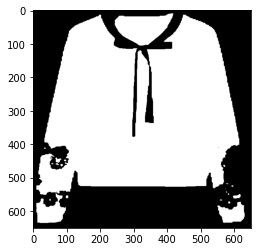

In [ ]:
# import the necessary packages
import numpy as np
import argparse
import time
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", type=str,
#	default=os.path.sep.join(["/content/drive/My Drive/Data-Preprocessing-Virtual-Try-On/grabcut-product-images", "s-1.jpg"]),
#	help="path to input image that we'll apply GrabCut to")
#ap.add_argument("-c", "--iter", type=int, default=10,
#	help="# of GrabCut iterations (larger value => slower runtime)")
#args = vars(ap.parse_args())

# load the input image from disk and then allocate memory for the
# output mask generated by GrabCut -- this mask should hae the same
# spatial dimensions as the input image
#image = cv2.imread(args["image"])
image = cv2.resize(cv2.imread('/content/drive/My Drive/Data-Preprocessing-Virtual-Try-On/grabcut-product-images/s-4.jpg'),(650,650))
mask = np.zeros(image.shape[:2], dtype="uint8")

# define the bounding box coordinates that approximately define my
# face and neck region (i.e., all visible skin)
rect = (10, 10, 625, 625)

# allocate memory for two arrays that the GrabCut algorithm internally
# uses when segmenting the foreground from the background
fgModel = np.zeros((1, 65), dtype="float")
bgModel = np.zeros((1, 65), dtype="float")
# apply GrabCut using the the bounding box segmentation method
start = time.time()
(mask, bgModel, fgModel) = cv2.grabCut(image, mask, rect, bgModel,
	fgModel, iterCount=10, mode=cv2.GC_INIT_WITH_RECT)
end = time.time()
print("[INFO] applying GrabCut took {:.2f} seconds".format(end - start))

# the output mask has for possible output values, marking each pixel
# in the mask as (1) definite background, (2) definite foreground,
# (3) probable background, and (4) probable foreground
#values = (
#	("Definite Background", cv2.GC_BGD),
#	("Probable Background", cv2.GC_PR_BGD),
#	("Definite Foreground", cv2.GC_FGD),
#	("Probable Foreground", cv2.GC_PR_FGD),
#)
# loop over the possible GrabCut mask values
#for (name, value) in values:
	# construct a mask that for the current value
#	print("[INFO] showing mask for '{}'".format(name))
#	valueMask = (mask == value).astype("uint8") * 255
	# display the mask so we can visualize it
#	plt.imshow(cv2.cvtColor(valueMask,cv2.COLOR_BGR2RGB))
#	plt.show()

# we'll set all definite background and probable background pixels
# to 0 while definite foreground and probable foreground pixels are
# set to 1
#outputMask = np.where((mask == cv2.GC_BGD) | (mask == cv2.GC_PR_BGD),	0, 1)
# scale the mask from the range [0, 1] to [0, 255]
#outputMask = (outputMask * 255).astype("uint8")

# apply a bitwise AND to the image using our mask generated by
# GrabCut to generate our final output image

#output = cv2.bitwise_and(image, image, mask=outputMask)
#plt.imshow(cv2.cvtColor(output,cv2.COLOR_BGR2RGB))
#plt.show()

value = cv2.GC_PR_FGD
valueMask = (mask == value).astype("uint8") * 255
plt.imshow(cv2.cvtColor(valueMask,cv2.COLOR_BGR2RGB))

plt.show()